# Sky noise distribution check

> Check that the error-normalised sky-subtracted flux in sky fibres resembles a standard Normal distribution.

In [ ]:
from dask.distributed import Client

from qagmire.diagnostics import SkyNoiseDistributionCheck
from qagmire.diagnostics.sky_noise_distribution_check import (
    plot_dist,
    plot_hist,
    plot_stack_over_single,
)

In [ ]:
# |hide

# This prevents warnings from appearing in cell outputs, since it has proven difficult
# to suppress warnings arising from dask workers.
%env PYTHONWARNINGS=ignore

env: PYTHONWARNINGS=ignore


## Test GA-CALIB dataset

### Stacked observations

In [ ]:
tests_stack = SkyNoiseDistributionCheck(stack=True, n_processes=8)
tests_stack.run(folder="GA-CALIB")

Locating and converting where necessary:   0%|                                                                                      | 0/12 [00:00<?, ?it/s]

Locating and converting where necessary:   8%|██████▌                                                                       | 1/12 [00:01<00:12,  1.12s/it]

Locating and converting where necessary:  25%|███████████████████▌                                                          | 3/12 [00:01<00:03,  2.64it/s]

Locating and converting where necessary:  42%|████████████████████████████████▌                                             | 5/12 [00:01<00:02,  3.32it/s]

Locating and converting where necessary:  50%|███████████████████████████████████████                                       | 6/12 [00:01<00:01,  3.84it/s]

Locating and converting where necessary:  75%|██████████████████████████████████████████████████████████▌                   | 9/12 [00:02<00:00,  5.30it/s]

Locating and converting where necessary:  83%|████████████████████████████████████████████████████████████████▏            | 10/12 [00:02<00:00,  5.82it/s]

Locating and converting where necessary:  92%|██████████████████████████████████████████████████████████████████████▌      | 11/12 [00:02<00:00,  5.03it/s]

Locating and converting where necessary: 100%|█████████████████████████████████████████████████████████████████████████████| 12/12 [00:03<00:00,  3.79it/s]

Locating and converting where necessary: 100%|█████████████████████████████████████████████████████████████████████████████| 12/12 [00:03<00:00,  3.74it/s]


Reading netCDF files... 

took 0.74 s. Size is 5296.042 Mb


Reading files:   0%|                                                                                                                | 0/12 [00:00<?, ?it/s]

Reading files:   8%|████████▋                                                                                               | 1/12 [00:00<00:03,  2.95it/s]

Reading files:  17%|█████████████████▎                                                                                      | 2/12 [00:00<00:02,  4.22it/s]

Reading files:  92%|██████████████████████████████████████████████████████████████████████████████████████████████▍        | 11/12 [00:00<00:00, 26.20it/s]

Reading files: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<00:00, 18.26it/s]


Creating Dataset... 

took 0.06 s. Size is 4.738 Mb


Tests took 5.35 s to prepare (including reading data).


Tests took 5.68 s to perform.
mean_non_zero:
    Is the mean of the normalised flux in sky fibres significantly different from zero?
stdev_non_unit:
    Is the standard deviation of the normalised flux in sky fibres significantly different from unity?
ks_non_normal:
    Does the distribution of normalised flux in sky fibres fail a KS test comparison with a standard Normal?


In [ ]:
tests_stack.summary(by=["OBID", "CAMERA"], sort_by_total_fails=False)

3 varieties of test and 114 tested elements per variety, for total of 342 tests.
333 tests failed (97.37%) and 9 tests passed (2.63%).


failed                              total fails
test         ks_non_normal mean_non_zero stdev_non_unit            
OBID  CAMERA                                                       
12366 BLUE              10            10              7          27
      RED               10            10             10          30
12367 BLUE               9             8              9          26
      RED                9             9              9          27
12382 BLUE               9             9              9          27
      RED                9             9              8          26
12383 BLUE              10            10             10          30
      RED               10            10             10          30
12392 BLUE               9             9              8          26
      RED                9             8              9          26
12398 BLUE              10             9              9          28
      RED               10            10             10          30

### Single observations

In [ ]:
tests_single = SkyNoiseDistributionCheck(n_processes=8)
tests_single.run(folder="GA-CALIB")

Locating and converting where necessary:   0%|                                                                                      | 0/36 [00:00<?, ?it/s]

Locating and converting where necessary: 100%|███████████████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 3629.77it/s]


Reading netCDF files... 

took 1.36 s. Size is 15887.744 Mb


Reading files:   0%|                                                                                                                | 0/36 [00:00<?, ?it/s]

Reading files:   3%|██▉                                                                                                     | 1/36 [00:00<00:05,  6.89it/s]

Reading files:  25%|██████████████████████████                                                                              | 9/36 [00:00<00:00, 39.01it/s]

Reading files:  47%|████████████████████████████████████████████████▋                                                      | 17/36 [00:00<00:00, 54.21it/s]

Reading files:  72%|██████████████████████████████████████████████████████████████████████████▍                            | 26/36 [00:00<00:00, 62.40it/s]

Reading files:  97%|████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 35/36 [00:00<00:00, 71.25it/s]

Reading files: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 58.82it/s]


Creating Dataset... 

took 0.12 s. Size is 14.210 Mb


Tests took 3.06 s to prepare (including reading data).


Tests took 9.67 s to perform.
mean_non_zero:
    Is the mean of the normalised flux in sky fibres significantly different from zero?
stdev_non_unit:
    Is the standard deviation of the normalised flux in sky fibres significantly different from unity?
ks_non_normal:
    Does the distribution of normalised flux in sky fibres fail a KS test comparison with a standard Normal?


In [ ]:
tests_single.summary(by="RUN")

3 varieties of test and 342 tested elements per variety, for total of 1026 tests.
998 tests failed (97.27%) and 28 tests passed (2.73%).


failed                              total fails
test    ks_non_normal mean_non_zero stdev_non_unit            
RUN                                                           
3050615            10            10             10          30
3050924            10            10             10          30
3050925            10            10             10          30
3050927            10            10             10          30
3050928            10            10             10          30
3050929            10            10             10          30
3051172            10            10             10          30
3051173            10            10             10          30
3051174            10            10             10          30
3051175            10            10             10          30
3051176            10            10             10          30
3051177            10            10             10          30
3050611            10             9             10          29
3050613            10             9             10          29
3050616            10             9             10          29
3050926            10            10              9          29
3050612            10             9              9          28
3050636             9             9              9          27
3050637             9             9              9          27
3050638             9             9              9          27
3050641             9             9              9          27
3051215             9             9              9          27
3050614            10             7              9          26
3050639             9             8              9          26
3050640             9             8              9          26
3050886             9             9              8          26
3050887             9             8              9          26
3050888             9             9              8          26
3050889             9             8              9          26
3050890             9             8              9          26
3051210             9             9              8          26
3051211             9             9              8          26
3051212             9             8              8          25
3051213             9             8              8          25
3051214             9             8              8          25
3050891             9             6              9          24

## Detail

There are systematic shifts, but there are also a substantial number of outliers on the measured mean and standard deviation of the sky. I suspect this is simply due to bad pixels, which require more robust statistics. However, should also be careful to ensure we identify places where the noise map is not accurate. **Work to be done**.

### Stacked observations

In [ ]:
dask_cluster = Client(n_workers=8, threads_per_worker=1, memory_limit="2GiB")
with dask_cluster as _:
    stats_stack = tests_stack.stats.to_pandas()
stats_stack = stats_stack.drop(columns=["RUN", "NSPEC", "filename"]).dropna()
stats_stack

CAMERA          MJD     NIGHT   OBID  stdev_measured  \
RUN     NSPEC                                                        
3050611 97       RED  60384.87280  20240315  12398        9.784142   
        193      RED  60384.87280  20240315  12398        9.957287   
        375      RED  60384.87280  20240315  12398       22.402952   
        432      RED  60384.87280  20240315  12398       10.245201   
        467      RED  60384.87280  20240315  12398       11.391346   
...              ...          ...       ...    ...             ...   
3051211 491     BLUE  60386.96006  20240317  12392       29.135481   
        503     BLUE  60386.96006  20240317  12392      112.048241   
        711     BLUE  60386.96006  20240317  12392       18.216553   
        806     BLUE  60386.96006  20240317  12392      441.106659   
        913     BLUE  60386.96006  20240317  12392       15.477137   

               stdev_expected  mean_zscore  stdev_zscore  err_on_mean_zscore  \
RUN     NSPEC                                                                  
3050611 97          17.635326     0.200687      0.741577            0.006200   
        193         17.721449     0.241912      0.633261            0.005294   
        375         16.108976    -0.758258      0.813899            0.006806   
        432         18.929451     0.127768      0.670510            0.005607   
        467         17.731205    -0.532087      0.750421            0.006276   
...                       ...          ...           ...                 ...   
3051211 491         19.476557     2.419528      1.351321            0.014154   
        503         20.322018    -5.847955      5.145679            0.053900   
        711         18.226244    -0.288502      0.980142            0.010284   
        806         20.856630   -12.845191     17.947260            0.188491   
        913         18.385750     0.096679      0.813556            0.008554   

               err_on_stdev_zscore  sig_mean_zscore  sig_stdev_zscore  \
RUN     NSPEC                                                           
3050611 97                0.004384        32.370790         58.947347   
        193               0.003744        45.691306         97.956419   
        375               0.004813       111.415295         38.670142   
        432               0.003965        22.787741         83.103565   
        467               0.004438        84.787263         56.241242   
...                            ...              ...               ...   
3051211 491               0.010009       170.942682         35.100643   
        503               0.038115       108.496524        108.767379   
        711               0.007272        28.052720          2.730530   
        806               0.133291        68.147554        127.145279   
        913               0.006049        11.301803         30.821575   

                     ks_prob  
RUN     NSPEC                 
3050611 97      0.000000e+00  
        193     0.000000e+00  
        375     0.000000e+00  
        432    1.618329e-287  
        467     0.000000e+00  
...                      ...  
3051211 491     0.000000e+00  
        503     0.000000e+00  
        711    4.886305e-105  
        806     0.000000e+00  
        913     1.168551e-56  

[114 rows x 13 columns]

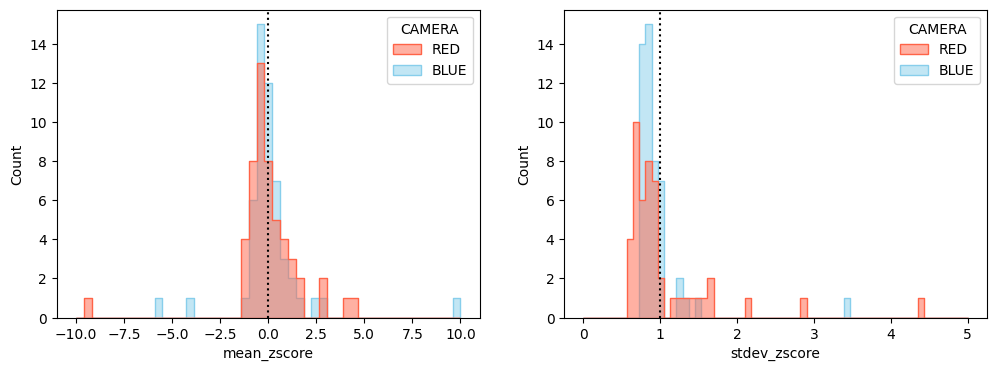

In [ ]:
plot_hist(stats_stack, mean_range=(-10, 10), stdev_range=(0.0, 5.0))

The mean flux in the sky-subtracted sky is significantly below zero, and the standard deviation of the sky is significantly below that expected from the errors. Both display a substantial number of outliers, which need investigating. 

Let's break it down by OB. Note that the extreme outliers make selecting the bandwidth for these plots difficult.

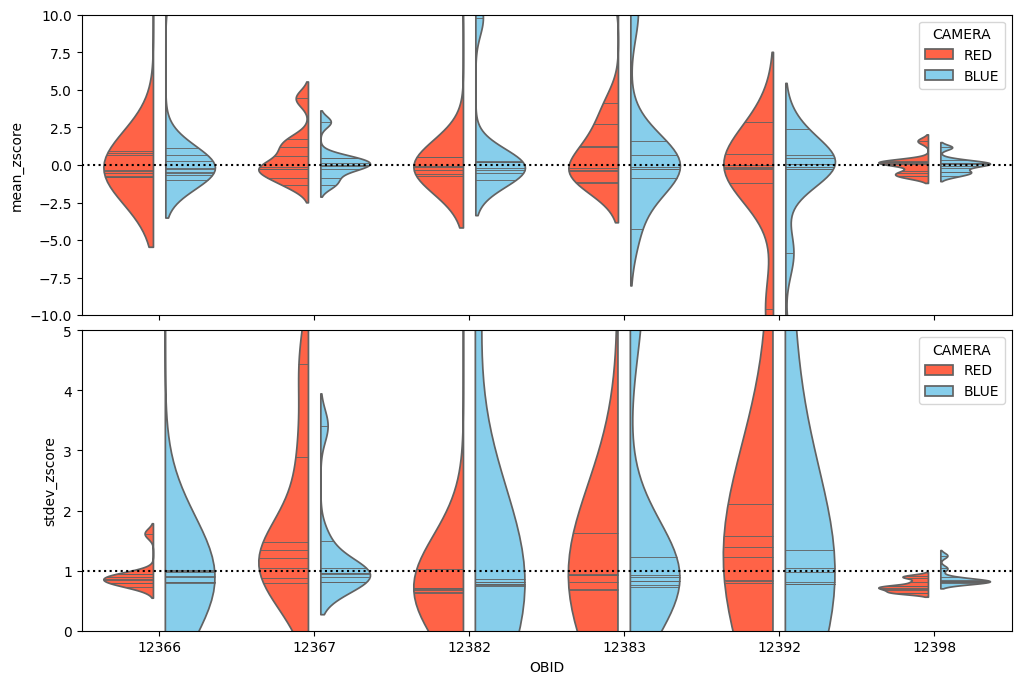

In [ ]:
plot_dist(
    stats_stack,
    sigma_clip=5,
    mean_range=(-10, 10),
    stdev_range=(0.0, 5.0),
    inner="stick",
)

### Single observations

In [ ]:
dask_cluster = Client(n_workers=8, threads_per_worker=1, memory_limit="2GiB")
with dask_cluster as _:
    stats_single = tests_single.stats.to_pandas()
stats_single = stats_single.drop(columns=["RUN", "NSPEC", "filename"]).dropna()
stats_single

CAMERA          MJD     NIGHT   OBID  stdev_measured  \
RUN     NSPEC                                                        
3050611 97       RED  60384.87280  20240315  12398        4.732673   
        193      RED  60384.87280  20240315  12398        5.425674   
        375      RED  60384.87280  20240315  12398       12.930606   
        432      RED  60384.87280  20240315  12398        5.644597   
        467      RED  60384.87280  20240315  12398        6.891780   
...              ...          ...       ...    ...             ...   
3051215 491     BLUE  60386.98835  20240317  12392       11.595710   
        503     BLUE  60386.98835  20240317  12392       35.203259   
        711     BLUE  60386.98835  20240317  12392        8.160785   
        806     BLUE  60386.98835  20240317  12392      139.362228   
        913     BLUE  60386.98835  20240317  12392        7.899908   

               stdev_expected  mean_zscore  stdev_zscore  err_on_mean_zscore  \
RUN     NSPEC                                                                  
3050611 97          10.332288     0.110196      0.620430            0.005187   
        193         10.377344     0.130211      0.580347            0.004852   
        375          9.455182    -0.464787      0.838622            0.007013   
        432         11.092417     0.069947      0.593808            0.004966   
        467         10.386356    -0.331541      0.691167            0.005781   
...                       ...          ...           ...                 ...   
3051215 491         11.406978     1.408187      0.957842            0.010033   
        503         11.851339    -3.080350      2.901796            0.030396   
        711         10.654712    -0.127563      0.806889            0.008466   
        806         12.133641    -6.953392      9.953850            0.104540   
        913         10.707053     0.080167      0.752101            0.007908   

               err_on_stdev_zscore  sig_mean_zscore  sig_stdev_zscore  \
RUN     NSPEC                                                           
3050611 97                0.003668        21.245287        103.487723   
        193               0.003431        26.836056        122.309783   
        375               0.004959        66.273529         32.540965   
        432               0.003512        14.084639        115.666472   
        467               0.004088        57.349730         75.546990   
...                            ...              ...               ...   
3051215 491               0.007095       140.360450          5.942263   
        503               0.021494       101.341605         88.479513   
        711               0.005987        15.067002         32.255081   
        806               0.073925        66.514065        121.120491   
        913               0.005592        10.137305         44.329564   

                    ks_prob  
RUN     NSPEC                
3050611 97     0.000000e+00  
        193    0.000000e+00  
        375    0.000000e+00  
        432    0.000000e+00  
        467    0.000000e+00  
...                     ...  
3051215 491    0.000000e+00  
        503    0.000000e+00  
        711    1.155737e-88  
        806    0.000000e+00  
        913    2.187225e-94  

[342 rows x 13 columns]

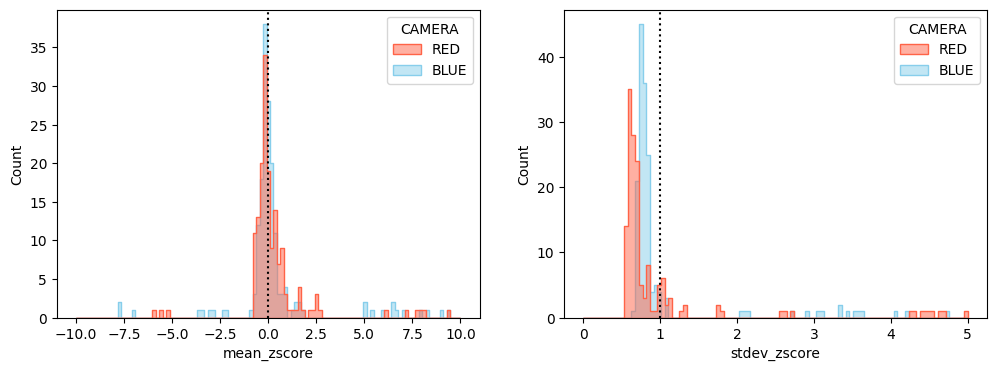

In [ ]:
plot_hist(stats_single, mean_range=(-10, 10), stdev_range=(0.0, 5.0))

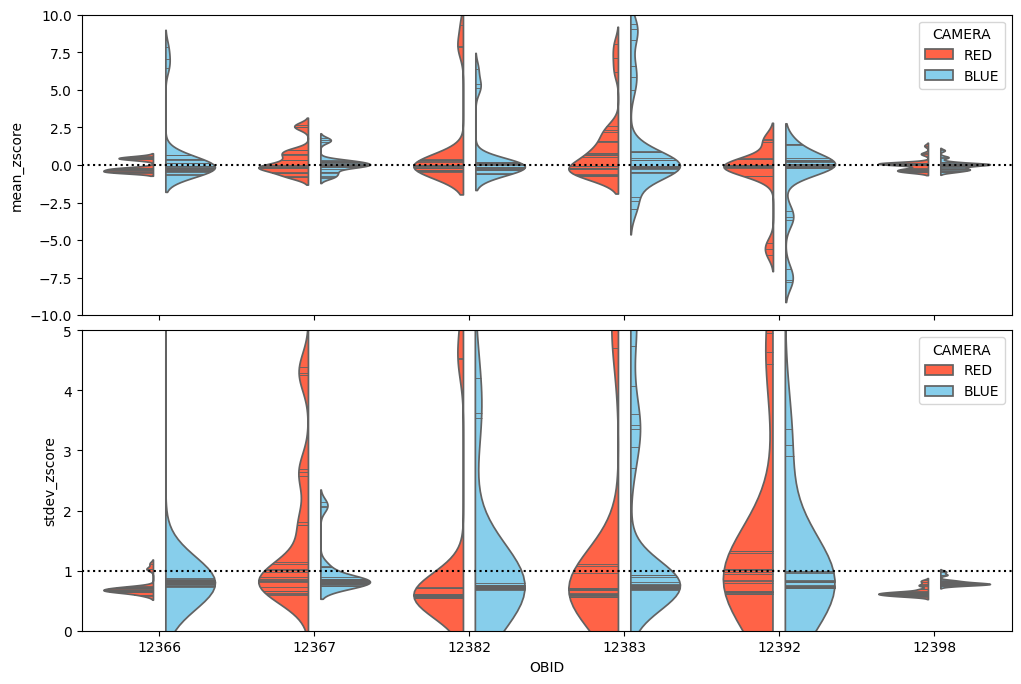

In [ ]:
plot_dist(
    stats_single,
    sigma_clip=5,
    mean_range=(-10, 10),
    stdev_range=(0.0, 5.0),
    inner="stick",
)

### Compare noise level in stacks and singles

In [ ]:
stack_over_single = (
    stats_stack.set_index(["OBID", "CAMERA"])[["stdev_measured", "stdev_expected"]]
    / stats_single.set_index(["OBID", "CAMERA"])[["stdev_measured", "stdev_expected"]]
)

In [ ]:
stack_over_single = stack_over_single.dropna()
stack_over_single

stdev_measured  stdev_expected
OBID  CAMERA                                
12366 BLUE          2.043285        1.709613
      BLUE          2.935687        1.682709
      BLUE          2.904439        1.607477
      BLUE          2.325622        1.476084
      BLUE          3.100327        1.667831
...                      ...             ...
12398 RED           0.870969        1.555680
      RED           1.817556        1.819420
      RED           1.600257        1.708372
      RED           1.642207        1.764194
      RED           1.413976        1.758083

[3258 rows x 2 columns]

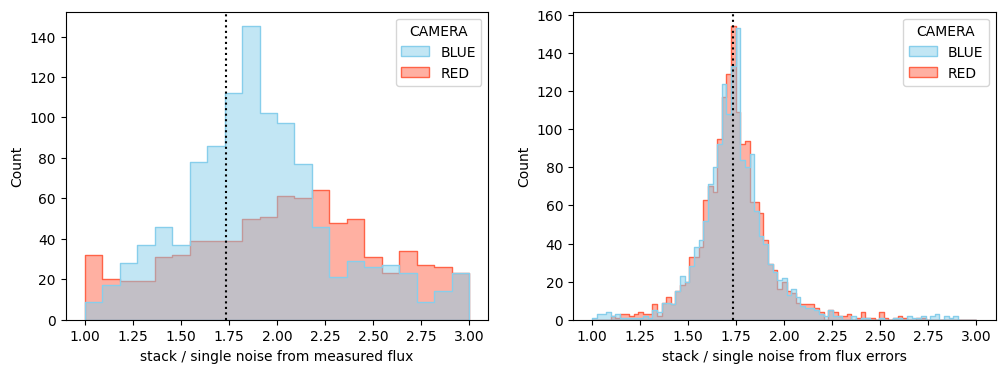

In [ ]:
plot_stack_over_single(stack_over_single)

The noise increases by a factor of $\sqrt{3}$, as expected for stacks that are the sum of three single exposures. However, there is sign of an additional contribution to the measured noise in the red stacks.